In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools 
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\rehab\Downloads\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

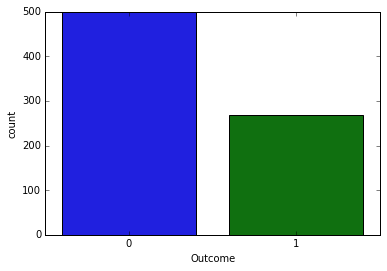

In [4]:
sns.countplot(x='Outcome',data=data)
plt.show()

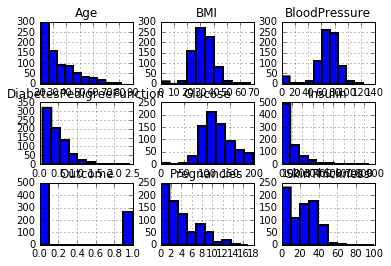

In [5]:
data.hist(edgecolor='black',linewidth=2,)
plt.show()

C:\Users\rehab\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


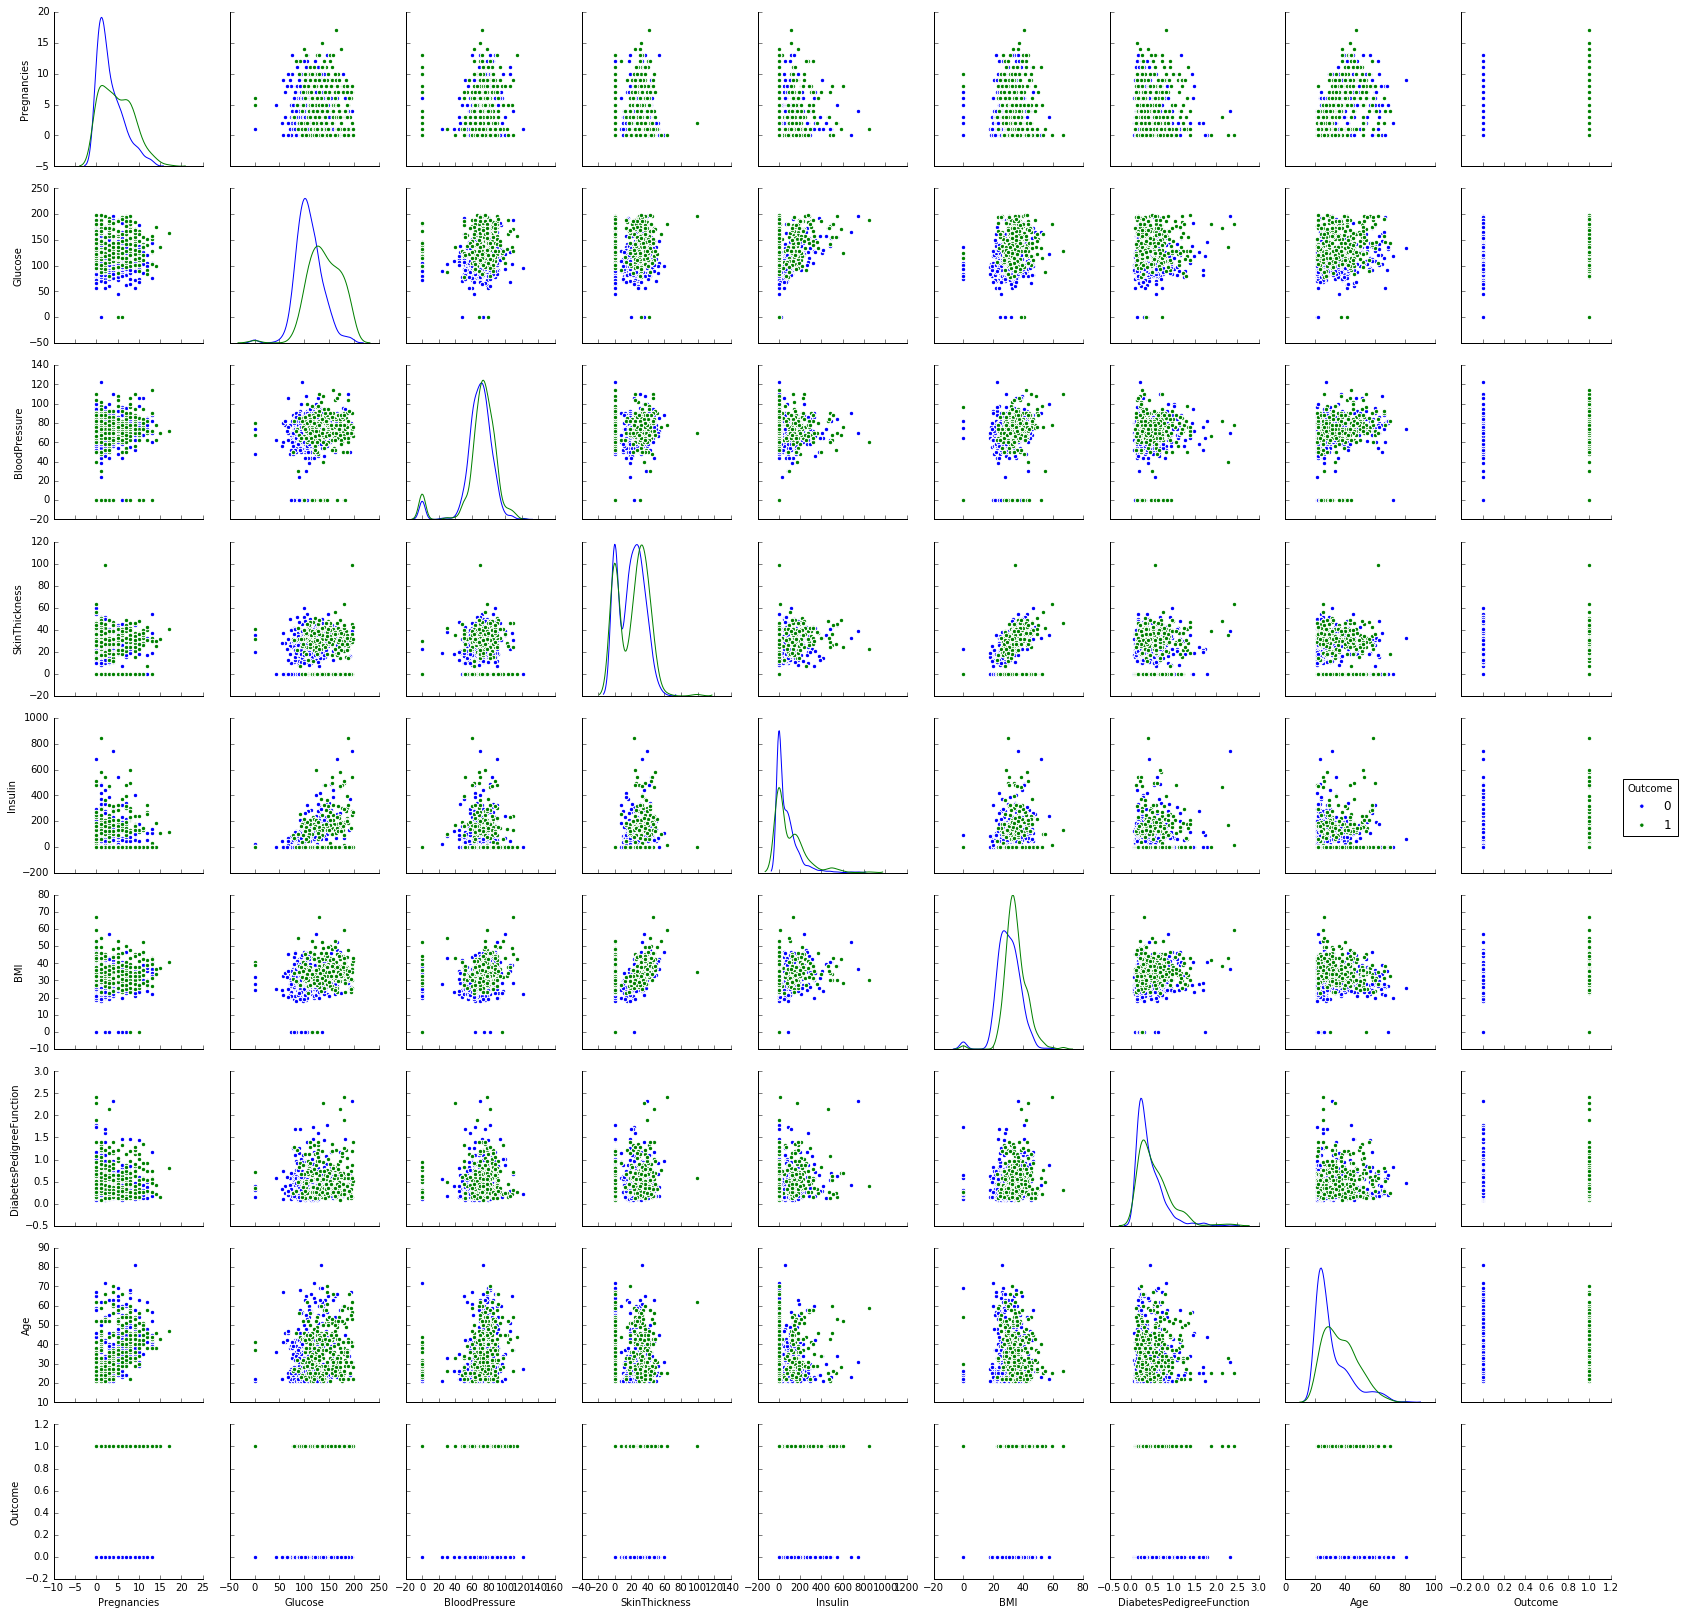

In [6]:
sns.pairplot(data=data,hue='Outcome',diag_kind='kde')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn import metrics 


In [8]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0,stratify=data['Outcome'])



In [9]:
#svm
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print('the accuracy of kernal',i,'is',metrics.accuracy_score(y_test,pred))

the accuracy of kernal rbf is 0.651041666667
the accuracy of kernal linear is 0.770833333333


In [10]:
# logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('the accuracy of model is ',metrics.accuracy_score(y_test,pred))

the accuracy of model is  0.776041666667


In [11]:
#decision tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('the accuracy of model is ',metrics.accuracy_score(y_test,pred))

the accuracy of model is  0.765625


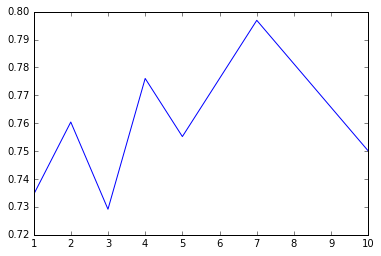

In [13]:
#K neighbor
acc=[]
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,pred))
    
plt.plot(range(1,11),acc)
plt.show()

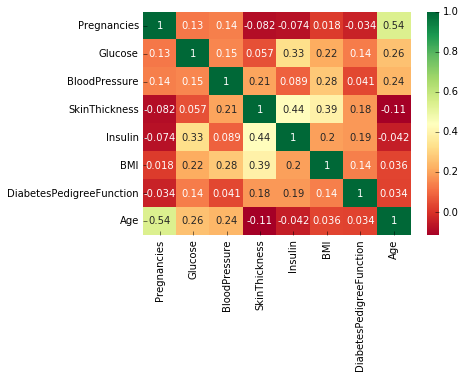

In [14]:
sns.heatmap(data[data.columns[:8]].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=0)

model.fit(x,y)
x=data[data.columns[:8]]

pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)


Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

In [16]:
data_new=data[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=data_new[data_new.columns[:4]]
y=data_new['Outcome']
x=sc.fit_transform(x)


xn_train,xn_test,yn_train,yn_test=train_test_split(x,y,test_size=0.25,random_state=0,stratify=data_new['Outcome'])

In [17]:
acc_new=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model=i
    model.fit(xn_train,yn_train)
    pred=model.predict(xn_test)
    acc_new.append(metrics.accuracy_score(yn_test,pred))

pd.DataFrame(acc_new,index=classifiers)    

,0
Linear Svm,0.781250
Radial Svm,0.770833
Logistic Regression,0.776042
KNN,0.729167
Decision Tree,0.734375


In [21]:
from sklearn.cross_validation import KFold #for K-fold cross validation
from sklearn.cross_validation import cross_val_score #score evaluation

In [29]:
kfold=KFold(n=len(data), n_folds=10)

In [33]:
acc_validaion=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model=i
    cv=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
    acc_validaion.append(cv.mean())
    
pd.DataFrame(acc_validaion,index=classifiers)    

,0
Linear Svm,0.774727
Radial Svm,0.769532
Logistic Regression,0.772112
KNN,0.738397
Decision Tree,0.690003


In [34]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

In [35]:
from sklearn.ensemble import VotingClassifier 


In [36]:
#linear && raduil svm
lin_rbf=VotingClassifier(estimators=[('linear_svm',linear_svc),('radual_svm',radial_svm)],voting='soft',weights=[2,1]).fit(xn_train,yn_train)
print('the accuracy of model is',lin_rbf.score(xn_test,yn_test))

the accuracy of model is 0.776041666667


In [37]:
#logistic && raduil svm
lin_rbf=VotingClassifier(estimators=[('logistic_redression',lr),('radual_svm',radial_svm)],voting='soft',weights=[2,1]).fit(xn_train,yn_train)
print('the accuracy of model is',lin_rbf.score(xn_test,yn_test))

the accuracy of model is 0.78125


In [38]:
#logistic && linearsvm
lin_rbf=VotingClassifier(estimators=[('logistic_redression',lr),('linear_svm',linear_svc)],voting='soft',weights=[2,1]).fit(xn_train,yn_train)
print('the accuracy of model is',lin_rbf.score(xn_test,yn_test))

the accuracy of model is 0.78125


In [39]:
#logistic && linear svm && rbf
lin_rbf=VotingClassifier(estimators=[('logistic_redression',lr),('linear_svm',linear_svc),('radual_svm',radial_svm)],voting='soft',weights=[2,1,3]).fit(xn_train,yn_train)
print('the accuracy of model is',lin_rbf.score(xn_test,yn_test))

the accuracy of model is 0.760416666667
